In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Maximo 4 decimales para los numeros por una cuestion de accesibilidad
pd.options.display.float_format = '{:,.4f}'.format

df = pd.read_csv('data/flights_preprocessed.csv')

In [61]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,...,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings
0,0,2023,1,1,7,2023-01-01,DL,N3758Y,2835,DEN,...,108.0000,78.0000,391.0000,2,0.0000,0.0000,21.0000,0.0000,72.0000,0
1,1,2023,1,1,7,2023-01-01,B6,N590JB,1370,MCO,...,123.0000,90.0000,667.0000,3,100.0000,0.0000,9.0000,0.0000,0.0000,0
2,2,2023,1,1,7,2023-01-01,B6,N323JB,1371,LGA,...,171.0000,152.0000,"1,076.0000",5,0.0000,0.0000,0.0000,0.0000,NaN,0
3,3,2023,1,1,7,2023-01-01,B6,N323JB,1372,FLL,...,169.0000,133.0000,"1,076.0000",5,0.0000,0.0000,0.0000,0.0000,NaN,0
4,4,2023,1,1,7,2023-01-01,B6,N962JT,1387,BOS,...,414.0000,372.0000,"2,611.0000",11,28.0000,0.0000,11.0000,0.0000,0.0000,0


In [62]:
df.drop(columns='Unnamed: 0', inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183349 entries, 0 to 2183348
Data columns (total 47 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Month                            int64  
 2   DayofMonth                       int64  
 3   DayOfWeek                        int64  
 4   FlightDate                       object 
 5   Reporting_Airline                object 
 6   Tail_Number                      object 
 7   Flight_Number_Reporting_Airline  int64  
 8   Origin                           object 
 9   OriginCityName                   object 
 10  OriginState                      object 
 11  OriginStateName                  object 
 12  Dest                             object 
 13  DestCityName                     object 
 14  DestState                        object 
 15  DestStateName                    object 
 16  CRSDepTime                       int64  
 17  DepTime 

In [64]:
df[df.duplicated() == True] #No hay filas duplicadas

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,...,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings


In [65]:
# Separamos en 2 dataframes con datos numericos y categoricos
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

In [66]:
df_num.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'Flight_Number_Reporting_Airline', 'CRSDepTime', 'DepTime', 'DepDelay',
       'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'Cancelled',
       'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime',
       'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'DivAirportLandings'],
      dtype='object')

In [67]:
df_cat.columns

Index(['FlightDate', 'Reporting_Airline', 'Tail_Number', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateName', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'DepTimeBlk',
       'ArrTimeBlk'],
      dtype='object')

In [68]:
# Pasamos unas columnas que son numeros pero tipo categoricas al dataframe de categoricas
df_cat['Flight_Number_Reporting_Airline'] = df['Flight_Number_Reporting_Airline']
df_cat['DepartureDelayGroups'] = df['DepartureDelayGroups']
df_cat['ArrivalDelayGroups'] = df['ArrivalDelayGroups']
df_cat['Cancelled'] = df['Cancelled']
df_cat['Diverted'] = df['Diverted']
df_cat['DistanceGroup'] = df['DistanceGroup']
df_cat['DepDel15'] = df['DepDel15']

In [69]:
df_num.drop(columns = ['Flight_Number_Reporting_Airline', 'DepartureDelayGroups','ArrivalDelayGroups','Cancelled','Diverted','DistanceGroup', 'DepDel15'], inplace=True)

In [70]:
df_num.describe()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,TaxiOut,WheelsOff,...,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings
count,"2,183,349.0000","2,183,349.0000","2,183,349.0000","2,183,349.0000","2,183,349.0000","2,148,096.0000","2,148,089.0000","2,148,089.0000","2,147,367.0000","2,147,367.0000",...,"2,183,344.0000","2,141,726.0000","2,141,726.0000","2,183,349.0000","2,183,349.0000","2,183,349.0000","2,183,349.0000","2,183,349.0000","471,608.0000","2,183,349.0000"
mean,"2,023.0000",2.5333,15.6037,3.9938,"1,332.3588","1,336.6396",12.5658,15.6615,17.7545,"1,359.6292",...,146.1072,141.2946,115.5790,828.8713,5.1861,0.7970,2.9067,0.0310,25.9502,0.0038
std,0.0000,1.1211,8.6860,2.0081,495.2248,509.7054,54.8811,53.8647,9.7570,511.4316,...,73.3036,73.6278,71.5118,596.2451,35.8162,15.9112,15.6214,1.8598,58.5872,0.1209
min,"2,023.0000",1.0000,1.0000,1.0000,1.0000,1.0000,-68.0000,0.0000,1.0000,1.0000,...,-5.0000,16.0000,8.0000,21.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,"2,023.0000",2.0000,8.0000,2.0000,910.0000,912.0000,-5.0000,0.0000,12.0000,929.0000,...,92.0000,88.0000,63.0000,398.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,"2,023.0000",3.0000,16.0000,4.0000,"1,324.0000","1,328.0000",-2.0000,0.0000,15.0000,"1,342.0000",...,130.0000,125.0000,99.0000,679.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,"2,023.0000",4.0000,23.0000,6.0000,"1,740.0000","1,749.0000",10.0000,10.0000,20.0000,"1,803.0000",...,177.0000,173.0000,145.0000,"1,067.0000",0.0000,0.0000,0.0000,0.0000,30.0000,0.0000
max,"2,023.0000",4.0000,31.0000,7.0000,"2,359.0000","2,400.0000","4,413.0000","4,413.0000",222.0000,"2,400.0000",...,"1,425.0000",759.0000,724.0000,"5,095.0000","3,957.0000","1,747.0000","1,660.0000","1,460.0000","2,530.0000",9.0000


[Text(0, 0.5, 'Minutos de atraso')]

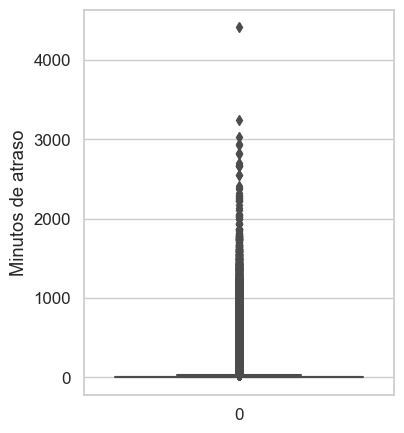

In [103]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [4, 5]})
sns.boxplot(
    df_num['DepDelayMinutes'], 
).set(ylabel='Minutos de atraso')

In [106]:
df['DepDel15'].value_counts()

DepDel15
0.0000    1691960
1.0000     456129
Name: count, dtype: int64